In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm


In [ ]:
import platform

if platform.system() == 'Windows':
    path = 'c:\\Windows\\Fonts\\malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font',family =font_name)
else:
    print('check your os system')

In [ ]:
국악 = pd.read_excel('C:\\Users\\od022\\데청캠 프로젝트\\수집+전처리\\files\\인터파크 인기공연\\인터파크_국악_2019+2020+2021.xlsx')
국악

,공연명,공연장소,공연기간,공연시간,관람연령,남성,여성,10대,20대,30대,40대,50대,공연년도,공연유형
0,안성맞춤 남사당공연-2019,안성맞춤 남사당공연장,2019.03.23 ~2019.11.30,75분,전체관람가,36.6,63.4,2.0,5.9,35.6,47.5,8.9,2019,국악
1,음악극 〈적로〉,서울돈화문국악당,2019.12.06 ~2019.12.29,100분,만 7세이상,23.5,76.5,4.2,34.8,30.4,18.2,9.2,2019,국악
2,2019 토요명품공연,국립국악원 우면당,2019.01.05 ~2019.12.28,90분,8세이상 관람가능,21.3,78.7,14.5,39.1,12.7,24.9,7.7,2019,국악
3,장사익 소리판 〈자화상七〉-천안,천안예술의전당 대공연장,2019.04.26,120분,초등학생이상 관람가,41.3,58.7,1.2,13.6,28.9,21.5,21.1,2019,국악
4,이희문컴퍼니의 특별한 민요콘서트 〈오방신과〉,서울남산국악당 크라운해태홀,2019.03.29 ~2019.03.30,80분,8세이상 관람가능,26.2,73.8,0.8,11.7,22.7,35.8,21.9,2019,국악
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,새로운 명상법 : Tradirapy,서울남산국악당 크라운해태홀,2021.07.23 ~2021.07.24,60분,만 15세이상,28.3,71.7,0.0,37.0,37.0,19.6,4.3,2021,국악
146,2021 시민국악강좌 〈우리악기 우리음악 - 대금 정소희〉,서울돈화문국악당,2021.07.23,90분,14세 이상 관람가,44.4,55.6,0.0,22.2,22.2,22.2,33.3,2021,국악
147,악단광칠 콘서트,서교스퀘어,2021.07.09,100분,만 7세이상,42.1,57.9,0.0,39.5,34.2,15.8,7.9,2021,국악
148,2021 실내악축제 〈국립국악관현악단 - 노크 초이스〉,서울돈화문국악당,2021.08.13,60분,전체관람가,25.0,75.0,0.0,10.0,30.0,35.0,25.0,2021,국악


In [ ]:
무용 = pd.read_excel('C:\\Users\\od022\\데청캠 프로젝트\\수집+전처리\\files\\인터파크 인기공연\\인터파크_무용_2019+2020+2021.xlsx')
무용

,공연명,공연장소,공연기간,공연시간,관람연령,남성,여성,10대,20대,30대,40대,50대,공연년도,공연유형
0,2019 예술의전당 ＆ 국립발레단〈호두까기인형〉,예술의전당 오페라극장,2019.12.14 ~2019.12.25,120분(인터미션 20분),48개월이상 관람가능,20.7,79.3,2.2,23.3,40.7,28.5,4.4,2019,무용
1,유니버설발레단 〈호두까기인형〉,유니버설아트센터,2019.12.21 ~2019.12.31,120분(인터미션 20분),48개월이상 관람가능,25.1,74.9,2.1,21.2,39.4,31.4,4.4,2019,무용
2,국립발레단 〈잠자는 숲속의 미녀〉,예술의전당 오페라극장,2019.04.24 ~2019.04.28,170분(인터미션 20분),8세이상 관람가능,14.6,85.4,1.8,23.1,40.1,26.6,7.0,2019,무용
3,국립발레단 〈백조의 호수〉,예술의전당 오페라극장,2019.08.28 ~2019.09.01,145분(인터미션 20분),8세이상 관람가능,14.2,85.8,2.2,24.1,42.1,25.4,5.0,2019,무용
4,2019 상트 페테르부르크 발레 씨어터 백조의 호수 내한공연,세종문화회관 대극장,2019.08.28 ~2019.09.01,155분(인터미션 35분),만 7세이상,22.1,77.9,1.2,19.5,34.8,28.6,12.0,2019,무용
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,"아디오스 피아졸라, 라이브 탱고 - 인천",인천서구문화회관 대공연장,2021.07.03,100분,만 7세이상,13.8,86.2,0.0,11.7,31.9,34.0,16.0,2021,무용
146,국립무용단 〈다섯 오〉,국립극장 달오름극장,2021.09.02 ~2021.09.05,70분,8세이상 관람가능,27.8,72.2,3.1,13.4,27.8,41.2,9.3,2021,무용
147,경기도무용단 〈률 律〉 - 수원,경기아트센터 대극장,2021.04.01 ~2021.04.02,115분(인터미션 15분),만 7세이상,24.1,75.9,0.0,20.7,31.0,34.5,13.8,2021,무용
148,2021원로예술인지원사업 기획공연 면벽〈面壁〉,서울남산국악당 크라운해태홀,2021.07.08 ~2021.07.09,85분(인터미션 15분),만 8세이상,9.5,90.5,0.0,33.3,14.3,33.3,19.0,2021,무용


In [ ]:
뮤지컬 = pd.read_excel('C:\\Users\\od022\\데청캠 프로젝트\\수집+전처리\\files\\인터파크 인기공연\\인터파크_뮤지컬_2019+2020+2021.xlsx')
뮤지컬

,공연명,공연장소,공연기간,공연시간,관람연령,남성,여성,10대,20대,30대,40대,50대,공연년도,공연유형
0,뮤지컬 〈아이다〉,블루스퀘어 인터파크홀,2019.11.13 ~2020.02.23,165분(인터미션 20분),8세이상 관람가능,26.6,73.4,4.0,32.1,33.8,20.9,7.9,2019,뮤지컬
1,뮤지컬 〈스위니토드〉,샤롯데씨어터,2019.10.02 ~2020.01.27,165분(인터미션 20분),중학생이상 관람가,18.8,81.2,6.6,38.1,34.3,15.9,4.5,2019,뮤지컬
2,뮤지컬 〈그날들〉,블루스퀘어 인터파크홀,2019.02.22 ~2019.05.06,165분(인터미션 20분),8세이상 관람가능,14.8,85.2,6.3,35.9,33.7,17.0,5.7,2019,뮤지컬
3,뮤지컬 〈벤허〉,블루스퀘어 인터파크홀,2019.07.30 ~2019.10.13,155분(인터미션 20분),만 7세이상,16.0,84.0,5.9,37.0,31.4,18.5,6.0,2019,뮤지컬
4,뮤지컬 〈레베카〉,충무아트센터 대극장,2019.11.16 ~2020.03.15,170분(인터미션 20분),8세이상 관람가능,23.5,76.5,4.3,36.2,34.7,17.4,6.3,2019,뮤지컬
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,뮤지컬 〈아이위시〉,서경대학교 공연예술센터 스콘2관,2021.03.16 ~2021.05.23,90분,만 13세이상,8.3,91.7,3.5,34.9,40.5,16.6,3.1,2021,뮤지컬
146,뮤지컬 블루레인（BLUE RAIN）,드림아트센터 1관,2021.03.16 ~2021.06.04,110분,만 13세이상,6.6,93.4,4.2,33.8,39.7,17.8,3.7,2021,뮤지컬
147,뮤지컬 〈홀연했던 사나이〉,대학로 TOM,2021.07.08 ~2021.09.26,110분,8세이상 관람가능,3.5,96.5,3.8,45.6,36.7,10.9,2.0,2021,뮤지컬
148,뮤지컬 〈붉은 정원〉,대학로 유니플렉스 2관,2021.02.05 ~2021.04.18,100분,만 15세이상,6.5,93.5,2.9,42.9,35.9,13.7,3.0,2021,뮤지컬


In [ ]:
연극 = pd.read_excel('C:\\Users\\od022\\데청캠 프로젝트\\수집+전처리\\files\\인터파크 인기공연\\인터파크_연극_2019+2020+2021.xlsx')
연극

,공연명,공연장소,공연기간,공연시간,관람연령,남성,여성,10대,20대,30대,40대,50대,공연년도,공연유형
0,10년 연속 1위 연극〈옥탑방고양이〉- 틴틴홀,대학로 틴틴홀,2010.04.06 ~오픈런,100분,만 13세이상,42.0,58.0,11.6,56.3,18.8,9.6,3.1,2019,연극
1,국민 코믹 연극 〈오백에 삼십〉 - 대학로 아트포레스트 1관,대학로 아트포레스트 1관,2018.09.04 ~오픈런,110분,만 13세이상,32.1,67.9,4.2,50.7,26.2,13.7,4.7,2019,연극
2,연극〈작업의 정석〉 - 대학로,대학로 연극 순위아트홀1관,2012.06.29 ~오픈런,90분,만 13세이상,38.3,61.7,7.8,55.8,21.6,10.3,3.9,2019,연극
3,연극 〈쉬어매드니스〉,콘텐츠박스,2015.11.12 ~오픈런,110분(인터미션 10분),만 15세이상,26.4,73.6,10.7,61.0,21.2,5.3,1.6,2019,연극
4,수상한 흥신소 1탄 (~11/3),수상한흥신소전용관,2018.03.19 ~오픈런,100분,만 13세이상,35.8,64.2,6.6,48.9,25.5,12.7,4.4,2019,연극
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,"SWEAT 스웨트: 땀, 힘겨운 노동",명동예술극장,2021.06.18 ~2021.07.18,175분(인터미션 15분),14세 이상 관람가,26.4,73.6,11.3,43.4,17.0,15.4,10.1,2021,연극
146,앙리할아버지와 나 - 수원,경기아트센터 소극장,2021.03.27 ~2021.03.28,115분,만 12세이상,46.5,53.5,5.3,34.9,38.4,14.9,5.3,2021,연극
147,연극 〈존경하는 엘레나 선생님〉 Live Stage,무이자할부,2021.06.24 ~2021.06.27,120분,만 14세이상,5.9,94.1,9.2,50.9,27.4,10.1,1.8,2021,연극
148,파우스트 엔딩,명동예술극장,2021.02.26 ~2021.03.28,100분,14세 이상 관람가,21.5,78.5,7.9,48.9,18.1,17.2,7.1,2021,연극


In [ ]:
클래식_오페라 = pd.read_excel('C:\\Users\\od022\\데청캠 프로젝트\\수집+전처리\\files\\인터파크 인기공연\\인터파크_클래식+오페라_2019+2020+2021.xlsx')
클래식_오페라

,공연명,공연장소,공연기간,공연시간,관람연령,남성,여성,10대,20대,30대,40대,50대,공연년도,공연유형
0,2019 디즈니 인 콘서트,세종문화회관 대극장,2019.05.18 ~2019.05.19,120분,48개월이상 관람가능,22.0,78.0,3.2,41.3,40.0,13.0,2.3,2019,클래식/오페라
1,2019 예술의전당 가족오페라 〈투란도트〉,예술의전당 CJ 토월극장,2019.08.08 ~2019.08.18,120분(인터미션 20분),8세이상 관람가능,30.5,69.5,1.9,18.8,23.7,40.2,13.1,2019,클래식/오페라
2,필름콘서트Ⅰ〈해리포터와 마법사의 돌〉,세종문화회관 대극장,2019.06.01 ~2019.06.02,180분(인터미션 20분),만 7세이상,12.6,87.4,4.1,69.7,18.5,5.7,1.8,2019,클래식/오페라
3,국립오페라단 〈헨젤과 그레텔〉,예술의전당 오페라극장,2019.12.05 ~2019.12.08,125분(인터미션 20분),8세이상 관람가능,20.2,79.8,2.0,8.5,28.3,56.6,3.4,2019,클래식/오페라
4,필름콘서트- Ⅱ 〈해리포터와 비밀의 방〉,세종문화회관 대극장,2019.11.16 ~2019.11.17,180분(인터미션 20분),만 7세이상,19.4,80.6,5.7,54.8,22.4,14.2,2.7,2019,클래식/오페라
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,레떼아모르 단독 콘서트 〈YOU’RE MY EVERYTHING〉 - 고양,고양아람누리 아람극장,2021.04.03,120분,만 7세이상,6.7,93.3,2.8,23.3,27.3,30.1,13.5,2021,클래식/오페라
144,한국인이 사랑하는 러시아 작곡가 시리즈 : 라흐마니노프,예술의전당 콘서트홀,2021.03.21,120분(인터미션 15분),8세이상 관람가능,26.8,73.2,3.4,32.3,36.9,18.9,6.1,2021,클래식/오페라
145,"청소년을 위한 〈스쿨 클래식 콘서트〉 Ⅱ, Ⅲ - 인천",아트센터인천 콘서트홀,2021.06.12 ~2021.09.04,70분,8세이상 관람가능,20.0,80.0,0.0,1.6,36.0,58.4,4.0,2021,클래식/오페라
146,〈팬텀 오브 클래식 2021〉 앙코르,세종문화회관 대극장,2021.03.28,180분(인터미션 20분),만 7세이상,6.1,93.9,1.5,22.4,29.5,30.4,13.1,2021,클래식/오페라


In [ ]:
df = pd.concat([국악,무용,뮤지컬,연극,클래식_오페라])
df

,공연명,공연장소,공연기간,공연시간,관람연령,남성,여성,10대,20대,30대,40대,50대,공연년도,공연유형
0,안성맞춤 남사당공연-2019,안성맞춤 남사당공연장,2019.03.23 ~2019.11.30,75분,전체관람가,36.6,63.4,2.0,5.9,35.6,47.5,8.9,2019,국악
1,음악극 〈적로〉,서울돈화문국악당,2019.12.06 ~2019.12.29,100분,만 7세이상,23.5,76.5,4.2,34.8,30.4,18.2,9.2,2019,국악
2,2019 토요명품공연,국립국악원 우면당,2019.01.05 ~2019.12.28,90분,8세이상 관람가능,21.3,78.7,14.5,39.1,12.7,24.9,7.7,2019,국악
3,장사익 소리판 〈자화상七〉-천안,천안예술의전당 대공연장,2019.04.26,120분,초등학생이상 관람가,41.3,58.7,1.2,13.6,28.9,21.5,21.1,2019,국악
4,이희문컴퍼니의 특별한 민요콘서트 〈오방신과〉,서울남산국악당 크라운해태홀,2019.03.29 ~2019.03.30,80분,8세이상 관람가능,26.2,73.8,0.8,11.7,22.7,35.8,21.9,2019,국악
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,레떼아모르 단독 콘서트 〈YOU’RE MY EVERYTHING〉 - 고양,고양아람누리 아람극장,2021.04.03,120분,만 7세이상,6.7,93.3,2.8,23.3,27.3,30.1,13.5,2021,클래식/오페라
144,한국인이 사랑하는 러시아 작곡가 시리즈 : 라흐마니노프,예술의전당 콘서트홀,2021.03.21,120분(인터미션 15분),8세이상 관람가능,26.8,73.2,3.4,32.3,36.9,18.9,6.1,2021,클래식/오페라
145,"청소년을 위한 〈스쿨 클래식 콘서트〉 Ⅱ, Ⅲ - 인천",아트센터인천 콘서트홀,2021.06.12 ~2021.09.04,70분,8세이상 관람가능,20.0,80.0,0.0,1.6,36.0,58.4,4.0,2021,클래식/오페라
146,〈팬텀 오브 클래식 2021〉 앙코르,세종문화회관 대극장,2021.03.28,180분(인터미션 20분),만 7세이상,6.1,93.9,1.5,22.4,29.5,30.4,13.1,2021,클래식/오페라


In [ ]:
df.to_excel('./files/인터파크 인기공연/국악+무용+뮤지컬+연극+클래식+오페라.xlsx')

In [ ]:
df = pd.read_excel('C:\\Users\\od022\\데청캠 프로젝트\\수집+전처리\\files\\인터파크 인기공연\\국악+무용+뮤지컬+연극+클래식+오페라.xlsx')

In [ ]:
df.columns

Index(['공연명', '공연장소', '공연기간', '공연시간', '관람연령', '남성', '여성', '10대', '20대', '30대',
       '40대', '50대', '공연년도', '공연유형'],
      dtype='object')

In [ ]:
columns = ['10대', '20대', '30대','40대', '50대']  # 군집분석에 사용될 연령변수

In [ ]:
labels = np.array(df['공연유형'])  # 공연 장르를 레이블로 설정

In [ ]:
df2 = df[columns]  # 연령변수만 넣은 데이터프레임 생성
df2.head()

,10대,20대,30대,40대,50대
0,2.0,5.9,35.6,47.5,8.9
1,4.2,34.8,30.4,18.2,9.2
2,14.5,39.1,12.7,24.9,7.7
3,1.2,13.6,28.9,21.5,21.1
4,0.8,11.7,22.7,35.8,21.9


In [ ]:
scaler = StandardScaler()  # 표준화
df2 = pd.DataFrame(scaler.fit_transform(df2))
df2.head()

,0,1,2,3,4
0,-0.485037,-1.483034,0.474341,2.000780,0.040374
1,0.114780,0.243336,-0.056777,-0.387090,0.082870
2,2.923015,0.500201,-1.864621,0.158942,-0.129607
3,-0.703152,-1.023067,-0.209984,-0.118149,1.768519
4,-0.812210,-1.136565,-0.843240,1.047262,1.881840


In [ ]:
df2.index = labels
df2.columns = columns
df2.head()

,10대,20대,30대,40대,50대
국악,-0.485037,-1.483034,0.474341,2.000780,0.040374
국악,0.114780,0.243336,-0.056777,-0.387090,0.082870
국악,2.923015,0.500201,-1.864621,0.158942,-0.129607
국악,-0.703152,-1.023067,-0.209984,-0.118149,1.768519
국악,-0.812210,-1.136565,-0.843240,1.047262,1.881840


## Elbow 기법(군집 개수 결정)

In [ ]:
distortions = []
def elbow(X):
    for i in range(1,10):    
        km = KMeans(n_clusters = i,
                init = 'k-means++',
               n_init= 10,
               max_iter = 300,
               random_state = 1)
        km.fit_predict(df2)
        distortions.append(km.inertia_)
    plt.plot(range(1,10), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion(SSE)')
    plt.tight_layout()
    #plt.savefig('인터파크 인기공연 elbow')
    plt.show()


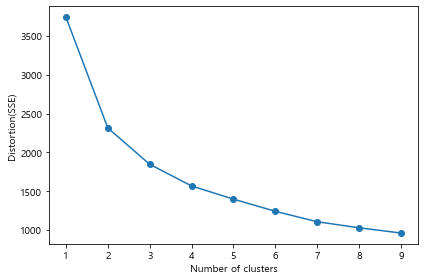

In [ ]:
elbow(df2)  # 군집 개수 3개 이후로 SSE 감소 완만

## K-Means 클러스터링

In [ ]:
km = KMeans(n_clusters = 3,
            init = 'k-means++',
           n_init= 10,
           random_state = 1)
pred = km.fit_predict(df2)

In [ ]:
cluster = pd.DataFrame(pred)
cluster.index = labels
cluster.columns = ['군집']
cluster

,군집
국악,2
국악,1
국악,1
국악,0
국악,0
...,...
클래식/오페라,0
클래식/오페라,2
클래식/오페라,2
클래식/오페라,0


## 실루엣 계수(군집 평가)

In [ ]:
def silhouette(X, pred):    
    cluster_labels = np.unique(pred)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, pred, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0,0
    yticks = []
    
    for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[pred == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor = 'none', color = color)

        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color = 'red', linestyle = "--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    #plt.savefig('인터파크 인기공연 실루엣')
    plt.show()


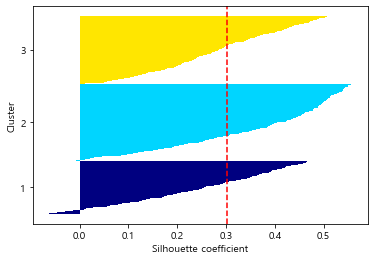

In [ ]:
silhouette(df2, pred)  # 군집평가

In [ ]:
df2['군집'] = pred
df2

,10대,20대,30대,40대,50대,군집
국악,-0.485037,-1.483034,0.474341,2.000780,0.040374,2
국악,0.114780,0.243336,-0.056777,-0.387090,0.082870,1
국악,2.923015,0.500201,-1.864621,0.158942,-0.129607,1
국악,-0.703152,-1.023067,-0.209984,-0.118149,1.768519,0
국악,-0.812210,-1.136565,-0.843240,1.047262,1.881840,0
...,...,...,...,...,...,...
클래식/오페라,-0.266921,-0.443628,-0.373405,0.582727,0.691970,0
클래식/오페라,-0.103335,0.093996,0.607121,-0.330042,-0.356249,2
클래식/오페라,-1.030325,-1.739899,0.515196,2.889101,-0.653716,2
클래식/오페라,-0.621359,-0.497390,-0.148701,0.607177,0.635309,0


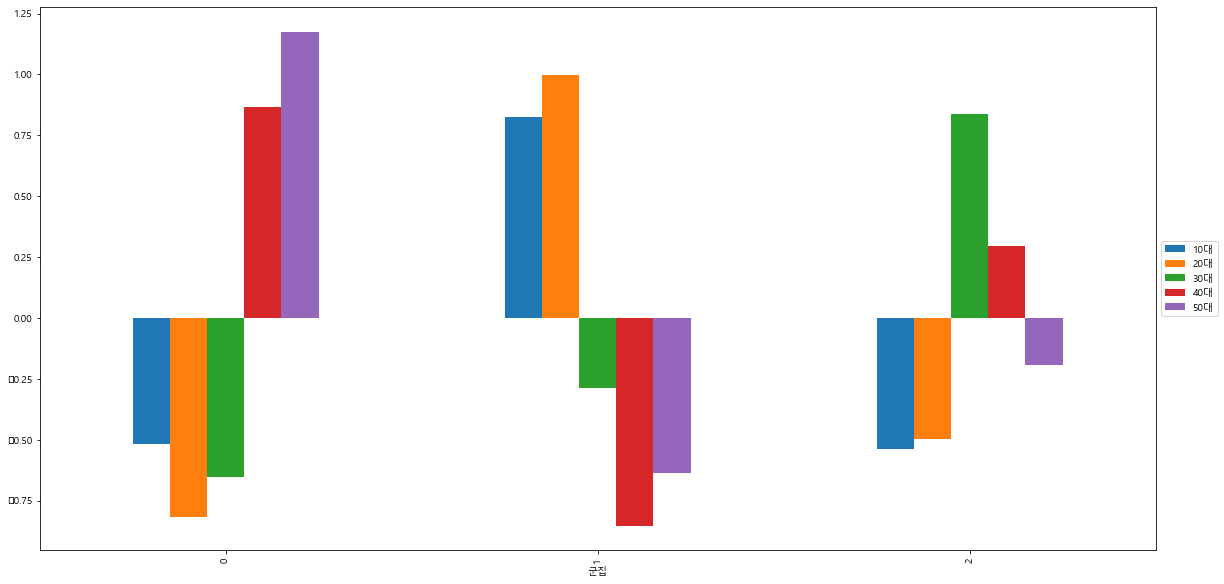

In [ ]:
df_group = df2.groupby("군집").mean()
df_group.plot(kind = "bar",figsize = (20,10))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('인터파크 인기공연 barplot')

In [ ]:
condition = df2['군집'] ==0

In [ ]:
df2['공연유형'] = df2.index
df2

,10대,20대,30대,40대,50대,군집,공연유형
국악,-0.485037,-1.483034,0.474341,2.000780,0.040374,2,국악
국악,0.114780,0.243336,-0.056777,-0.387090,0.082870,1,국악
국악,2.923015,0.500201,-1.864621,0.158942,-0.129607,1,국악
국악,-0.703152,-1.023067,-0.209984,-0.118149,1.768519,0,국악
국악,-0.812210,-1.136565,-0.843240,1.047262,1.881840,0,국악
...,...,...,...,...,...,...,...
클래식/오페라,-0.266921,-0.443628,-0.373405,0.582727,0.691970,0,클래식/오페라
클래식/오페라,-0.103335,0.093996,0.607121,-0.330042,-0.356249,2,클래식/오페라
클래식/오페라,-1.030325,-1.739899,0.515196,2.889101,-0.653716,2,클래식/오페라
클래식/오페라,-0.621359,-0.497390,-0.148701,0.607177,0.635309,0,클래식/오페라


In [ ]:
cluster_0 = df2[condition]
cluster_0

,10대,20대,30대,40대,50대,군집,공연유형
국악,-0.703152,-1.023067,-0.209984,-0.118149,1.768519,0,국악
국악,-0.812210,-1.136565,-0.843240,1.047262,1.881840,0,국악
국악,-0.539566,-0.700492,-0.393832,0.762021,0.805291,0,국악
국악,-0.512301,-0.999172,-0.873881,1.707390,0.366172,0,국악
국악,-0.675888,-0.521284,-0.332550,0.590877,1.102758,0,국악
...,...,...,...,...,...,...,...
클래식/오페라,-0.757681,-0.987225,-0.720674,1.528096,0.847786,0,클래식/오페라
클래식/오페라,-0.430508,-0.234552,-0.271267,0.126343,1.003602,0,클래식/오페라
클래식/오페라,-0.266921,-0.443628,-0.373405,0.582727,0.691970,0,클래식/오페라
클래식/오페라,-0.621359,-0.497390,-0.148701,0.607177,0.635309,0,클래식/오페라


In [ ]:
cluster_0['공연유형'].value_counts() # 4-50대 높은 0번 군집에는 주로 국악,클래식/오페라,무용(연극,뮤지컬 취약)

국악         73
클래식/오페라    70
무용         51
연극          5
뮤지컬         1
Name: 공연유형, dtype: int64

In [ ]:
condition = df2['군집'] ==1
cluster_1 = df2[condition]
cluster_1

,10대,20대,30대,40대,50대,군집,공연유형
국악,0.114780,0.243336,-0.056777,-0.387090,0.082870,1,국악
국악,2.923015,0.500201,-1.864621,0.158942,-0.129607,1,국악
국악,-1.030325,1.951786,-0.914737,-0.876074,-0.880358,1,국악
국악,0.959977,2.166835,-0.945378,-1.666598,-1.022010,1,국악
국악,3.304716,2.298254,-3.059636,-1.422106,-0.087112,1,국악
...,...,...,...,...,...,...,...
클래식/오페라,0.196573,0.416571,-0.547040,-0.167048,0.026209,1,클래식/오페라
클래식/오페라,4.177177,0.488254,-1.098585,-0.460438,-0.597056,1,클래식/오페라
클래식/오페라,0.850919,1.007957,0.270065,-1.161315,-0.809533,1,클래식/오페라
클래식/오페라,0.551011,1.557528,-0.976019,-0.851625,-0.823698,1,클래식/오페라


In [ ]:
cluster_1['공연유형'].value_counts()  # 10-20대 높은 1번 군집은 주로 연극, 뮤지컬

연극         117
뮤지컬        110
국악          30
클래식/오페라     22
무용          13
Name: 공연유형, dtype: int64

In [ ]:
condition = df2['군집'] ==2
cluster_2 = df2[condition]
cluster_2

,10대,20대,30대,40대,50대,군집,공연유형
국악,-0.485037,-1.483034,0.474341,2.000780,0.040374,2,국악
국악,-0.784945,-1.680163,2.128978,1.422150,-1.092835,2,국악
국악,0.332896,-1.536796,0.413058,0.574578,-0.512065,2,국악
국악,-1.030325,0.147759,0.443700,-0.069251,-0.101277,2,국악
국악,-1.030325,-1.052935,0.494769,1.104310,0.323677,2,국악
...,...,...,...,...,...,...,...
클래식/오페라,-0.321450,-0.103132,0.188355,-0.085550,0.281181,2,클래식/오페라
클래식/오페라,-0.594094,-0.228578,0.392631,-0.346342,0.706135,2,클래식/오페라
클래식/오페라,-0.784945,-0.431680,1.567219,-0.028502,-0.384579,2,클래식/오페라
클래식/오페라,-0.103335,0.093996,0.607121,-0.330042,-0.356249,2,클래식/오페라


In [ ]:
cluster_2['공연유형'].value_counts()  # 30대가 높은 2번 군집은 모든 공연 유형이 고르게 분포

무용         86
클래식/오페라    56
국악         47
뮤지컬        39
연극         28
Name: 공연유형, dtype: int64